# Семинар 9. scikit-learn.

  * обучение с учителем
    * классификация
    * регрессия
  * обучение без учителя
 

In [1]:
import sklearn.datasets
digits = sklearn.datasets.load_digits()

In [2]:
print(digits.target)

[0 1 2 ..., 8 9 8]


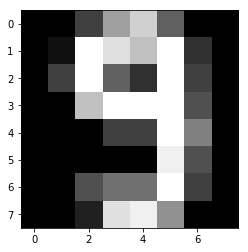

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

_ = plt.imshow(digits.data[-5].reshape(8, 8), cmap='gray')

In [4]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-5], digits.target[:-5])
clf.predict(digits.data[-5:])

array([9, 0, 8, 9, 8])

## 7.1. Обучение с учителем

  1. Различные линейные модели (в том числе гребневая (ридж) регрессия)
  - Метод опорных векторов
  - Стохастический градиентный спуск
  - Метод k ближайших соседей
  - Регрессия на основе гауссовских процессов
  - Cross decomposition
  - Наивный байесовский классификатор
  - Решающие деревья
  - Multiclass and multilabel algorithms
  - Нейронные сети
  - и др.

### 7.1.1. Метод наименьших квадратов

Документация: http://scikit-learn.org/stable/modules/linear_model.html

Исходный пример взят из документации: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

Coefficients:  [[ 3.]] [ 4.]
Score: 1.00


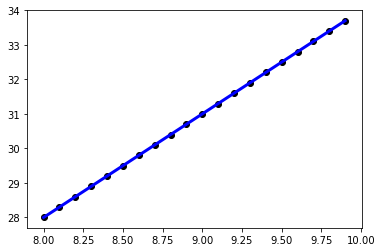

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model


x = np.arange(0, 10, 0.1).reshape(-1, 1)
y = x * 3 + 4

xTrain, yTrain = x[:-20], y[:-20]
xTest, yTest = x[-20:], y[-20:]

regr = linear_model.LinearRegression()
regr.fit(xTrain, yTrain)

print('Coefficients: ', regr.coef_, regr.intercept_)
print('Score: {:.2f}'.format(regr.score(xTest, yTest)))

plt.scatter(xTest, yTest,  color='black')
plt.plot(xTest, regr.predict(xTest), color='blue', linewidth=3)
plt.show()

### 7.1.2. Метод k ближайших соседей

Документация: http://scikit-learn.org/stable/modules/neighbors.html

Исходный пример взят из документации: http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

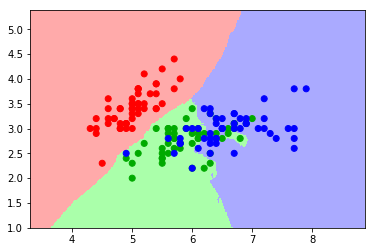

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmapLight = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmapBold = ListedColormap(['#FF0000', '#00AA00', '#0000FF'])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))

zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, zz, cmap=cmapLight)
_ = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmapBold)


### 7.1.3. Многослойный персептрон

Документация: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-2, hidden_layer_sizes=(16, 16), random_state=1)

clf.fit(digits.data[:-5], digits.target[:-5])
clf.predict(digits.data[-5:])

array([9, 0, 8, 9, 8])

Для сравнения:

In [8]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-5], digits.target[:-5])
clf.predict(digits.data[-5:])

array([9, 0, 8, 9, 8])

### 7.1.4. Деревья решений

Пример: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load data
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Train

clf = DecisionTreeClassifier().fit(X, y)

def PlotTrained(X, y, clf):
    # Parameters
    n_classes = 3
    plot_colors = ['#FF0000', '#0000FF', '#00DD00']
    h = 0.02

    # Plot the decision boundary
    xMin, xMax = X[:, 0].min() - 1, X[:, 0].max() + 1
    yMin, yMax = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(xMin, xMax, plot_step), np.arange(yMin, yMax, h))
    zz = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    cs = plt.contourf(xx, yy, zz, cmap=plt.cm.Pastel1)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)

PlotTrained(X, y, clf)

NameError: name 'plot_step' is not defined

In [ ]:
clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
PlotTrained(X, y, clf)

In [ ]:
clf = DecisionTreeClassifier(max_depth=4).fit(X, y)
PlotTrained(X, y, clf)

## 7.2. Обучение без учителя

1. Gaussian mixture models
2. Manifold learning
3. Clustering
4. Biclustering
5. Decomposing signals in components (matrix factorization problems)
6. Covariance estimation
7. Novelty and Outlier Detection
8. Density Estimation
9. Нейронные сети

Документация: http://scikit-learn.org/stable/unsupervised_learning.html

### 7.2.1. K-means

Документация: http://scikit-learn.org/stable/modules/clustering.html

Пример: http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

np.random.seed(0)

nClusters = 5
X, labels = make_blobs(n_samples=5000, cluster_std=0.7, centers=nClusters)

kMeans = KMeans(init='k-means++', n_clusters=nClusters, n_init=10)
kMeans.fit(X)
predicted = kMeans.predict(X)
colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#FF0000', '#00FF00', '#0000FF']

for k, col in zip(range(n_clusters), colors):
    members = predicted == k
    plt.plot(X[members, 0], X[members, 1], 'w', markerfacecolor=col, marker='.')

### Дальнейшее изучение:

  - https://tensorflow.org
  - https://keras.io/

### Материалы:

1. https://github.com/amueller/introduction_to_ml_with_python
2. https://github.com/esokolov/ml-course-hse
3. https://github.com/diefimov/MTH594_MachineLearning

The Neural Network Zoo: http://www.asimovinstitute.org/neural-network-zoo/

![](http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png)